<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 , n_redundant = 0 , n_classes = 2 , n_clusters_per_class = 1 , random_state= 41)

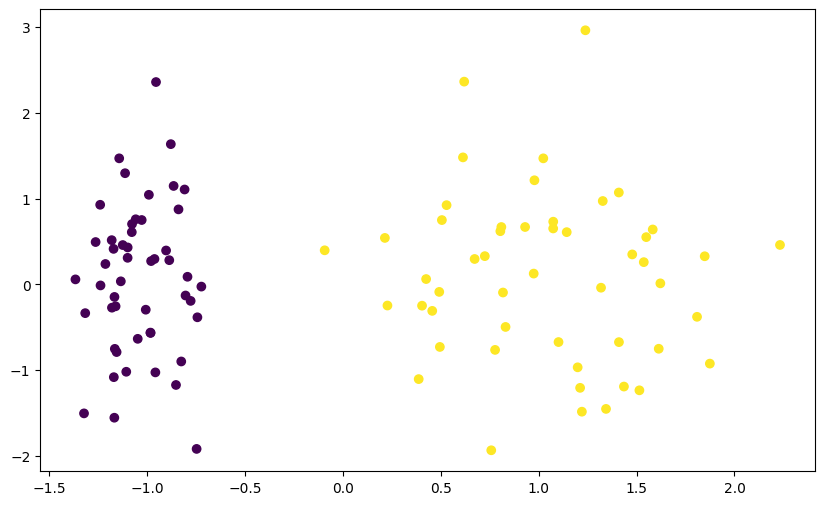

In [9]:
import matplotlib.pyplot as plt
plt .figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1],c=y)